# Dataset visualization notebook
This notebook that visualize the custom dataset that was written into the hard drive for sanity checking
Reference:
- [https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch](https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch)
- [https://www.kaggle.com/code/jeanpat/minimalist-mask-to-coco-format-dataset-conversion](https://www.kaggle.com/code/jeanpat/minimalist-mask-to-coco-format-dataset-conversion)

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image

In [4]:
%matplotlib inline

# Instance segmentation dataset

In [18]:
# Test the Pan-Nuke dataset
coco = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations_region_only/train_instances.json')
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/images"
image_id = 5


loading annotations into memory...
Done (t=1.07s)
creating index...
index created!


{'license': 1, 'file_name': '5.jpg', 'coco_url': '', 'height': 256, 'width': 256, 'date_captured': '', 'flickr_url': '', 'organ': 'Breast', 'id': 5}
annotation id = [35, 36, 37, 38, 39, 40, 41]
Category id = [1, 1, 1, 2, 2, 3, 3]


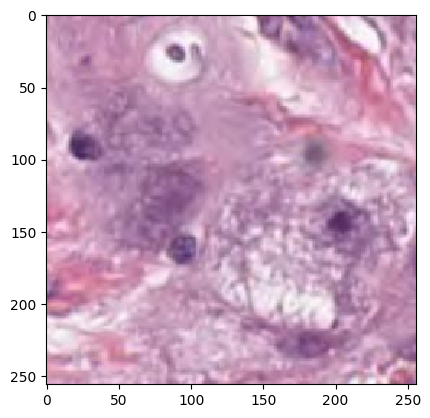

In [19]:
img = coco.imgs[image_id]

cat_ids = coco.getImgIds()
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')

# Get the ids of the captions
#caption_annotation_ids = coco_captions.getAnnIds(imgIds=image_id)
#print(caption_annotation_ids)
#captions = coco_captions.loadAnns(caption_annotation_ids)
print(img)
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
annos = coco.loadAnns(anns_ids)
print(f"annotation id = {anns_ids}")
print(f"Category id = {[x['category_id'] for x in annos]}")

In [11]:
image_id

5

In [15]:
#coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/quilt1m/quilt_coco/annotations/train_captions.json')
#image_id = 43

#coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/detectron2/coco/annotations/captions_val2017.json')
#image_id = 397133


coco = COCO("/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations/train_instances.json")
coco_captions = COCO('/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/annotations/train_captions.json')
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/images"
image_id = 4000


img = coco.imgs[image_id]
img_dir = "/jupyter-users-home/tan-2enguyen/datasets/pathology/anno_caption_merged/images"


# Get the ids of the captions
caption_annotation_ids = coco_captions.getAnnIds(imgIds=image_id)
print(caption_annotation_ids)
captions = coco_captions.loadAnns(caption_annotation_ids)
print(img)
print(captions)

loading annotations into memory...
Done (t=1.62s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
[3869]
{'license': 1, 'file_name': '4000.jpg', 'coco_url': '', 'height': 256, 'width': 256, 'date_captured': '', 'flickr_url': '', 'organ': 'Adrenal_gland', 'id': 4000}
[{'id': 3869, 'image_id': 4000, 'caption': 'inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell'}]


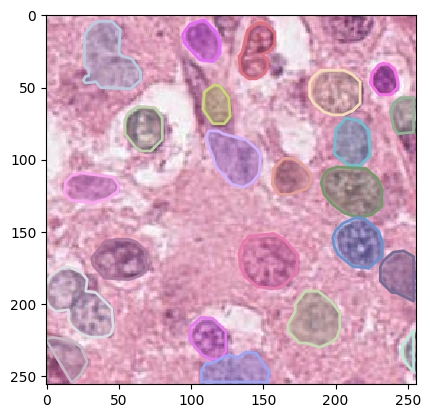

In [16]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')

cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

plt.show()

inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell, inflammatory cell


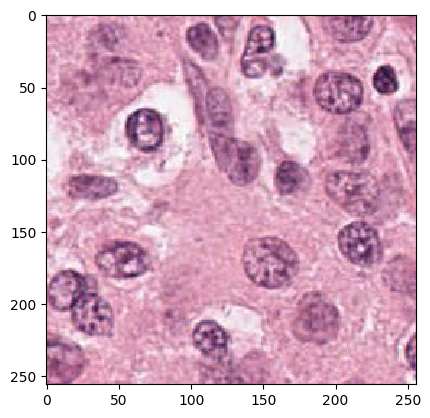

In [17]:
coco_captions.showAnns(captions)
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')


In [69]:
anns_ids

[]

In [59]:
anns

[]